<a href="https://colab.research.google.com/github/AmrFathyAhmed/soft_computing_12_project/blob/main/SC_12_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy import stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from google.colab import drive
SEED=30


In [ ]:
# Load the dataset
data = pd.read_csv('/content/Ames_Housing_Data.csv')

median_price = data['SalePrice'].median()
data['Label'] = (data['SalePrice'] > median_price).astype(int)
# Display value counts of target variable
print(data['SalePrice'].value_counts())


SalePrice
135000    34
140000    33
130000    29
155000    28
145000    26
          ..
164990     1
117250     1
97900      1
35000      1
138887     1
Name: count, Length: 1032, dtype: int64


In [ ]:
data.shape

(2930, 82)

In [ ]:
print(data.columns)

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [ ]:
# Display the first few rows of the dataset
data.head()


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Label
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,1
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,0
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,1
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,1
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,1


In [ ]:
data.dtypes

,0
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
Lot Area,int64
...,...
Yr Sold,int64
Sale Type,object
Sale Condition,object
SalePrice,int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [ ]:

if 'Label' not in data.columns:
    median_price = data['SalePrice'].median()
    data['Label'] = (data['SalePrice'] > median_price).astype(int)


if 'SalePrice' in data.columns:
    data = data.drop('SalePrice', axis=1)
classes = {0: 'Below Median Price', 1: 'Above Median Price'}

In [ ]:
print(data.columns)

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# التعامل مع القيم الفاضية في الأعمدة الرقمية فقط
data.fillna(data.median(numeric_only=True), inplace=True)

# تحويل الأعمدة النصية لأرقام باستخدام LabelEncoder
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

print("Shape after Label Encoding:", data.shape)

Shape after Label Encoding: (2930, 81)


In [ ]:
# التأكد من وجود الهدف
X = data.drop('Label', axis=1)
y = data['Label']

print("Features shape:", X.shape)
print("Target distribution:\n", y.value_counts())


Features shape: (2930, 80)
Target distribution:
 Label
0    1467
1    1463
Name: count, dtype: int64


In [ ]:
# total null elements

data.isnull().sum()[data.isnull().sum() > 0]

,0


In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)



In [ ]:
# Calculate feature importance using Mutual Information and Point-Biserial correlation
point_biserial_coefs = []
for i in range(X.shape[1]):
    coef = stats.pointbiserialr(X.iloc[:, i], y)[0]
    point_biserial_coefs.append(coef)

mutual_inf = mutual_info_classif(X, y)

In [ ]:
# Create a DataFrame to store feature importance
feature_importance = pd.DataFrame({'Mutual Inf': mutual_inf, 'Point-BiSerial': point_biserial_coefs}, index=X.columns)

In [ ]:
# Sort feature importance based on 'Point-BiSerial' column in descending order
sorted_feature_importance = feature_importance.sort_values(by='Point-BiSerial', ascending=False)

print(sorted_feature_importance)

               Mutual Inf  Point-BiSerial
Overall Qual     0.313916        0.674081
Full Bath        0.218095        0.611337
Year Built       0.276004        0.591459
Garage Cars      0.215809        0.579992
Gr Liv Area      0.261657        0.565414
...                   ...             ...
Garage Type      0.163605       -0.483142
Kitchen Qual     0.167095       -0.490980
Exter Qual       0.208012       -0.494223
Bsmt Qual        0.209749       -0.537920
Garage Finish    0.179034       -0.567507

[80 rows x 2 columns]


In [ ]:
feature_importance.sort_values(by = 'Mutual Inf', ascending = False)


,Mutual Inf,Point-BiSerial
PID,0.442346,-0.210707
Overall Qual,0.313916,0.674081
Neighborhood,0.301080,0.079843
Year Built,0.276004,0.591459
Gr Liv Area,0.261657,0.565414
...,...,...
BsmtFin Type 2,0.000000,0.004992
Bsmt Half Bath,0.000000,-0.023329
Pool Area,0.000000,0.036094
Pool QC,0.000000,-0.046124


In [ ]:
# drop highly correlated features
X.drop(['Functional',
    'Pool Area',
    'Misc Feature',
    'Yr Sold',
    'Mo Sold'], axis = 1, inplace = True)

In [ ]:
print(X.columns)


Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars

In [ ]:
SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = SEED)

print('train samples ->', X_train.shape)
print('test samples ->', X_test.shape)

train samples -> (2197, 75)
test samples -> (733, 75)


In [ ]:
# Scaling numerical data
MM = MinMaxScaler()
MM_fit = MM.fit(X_train)
X_train = MM_fit.transform(X_train)
X_test = MM_fit.transform(X_test)


In [ ]:
# Initialize the your model

model = SVC(kernel='linear', random_state=SEED)

# Train the model on the training data
model.fit(X_train, y_train)



SVC(kernel='linear', random_state=30)

In [ ]:
# Make predictions
pred = model.predict(X_test)

# Calculate Mean Squared Error and Accuracy Score
acc = accuracy_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print('Mean Squared Error : {0:.5f}'.format(mse))
print('Accuracy Score : {0:.2f} %'.format(acc * 100))

Mean Squared Error : 0.06003
Accuracy Score : 94.00 %


                    precision    recall  f1-score   support

Below Median Price       0.93      0.95      0.94       356
Above Median Price       0.95      0.93      0.94       377

          accuracy                           0.94       733
         macro avg       0.94      0.94      0.94       733
      weighted avg       0.94      0.94      0.94       733



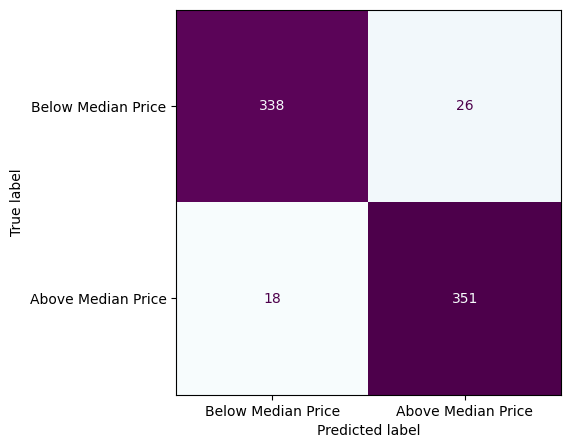

In [ ]:
# classification report

clf_report = classification_report(pred, y_test, target_names = list(classes.values()))
print(clf_report)
# Generate confusion matrix and plot it
cm = confusion_matrix(y_test, pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(classes.values()))

fig, ax = plt.subplots(figsize=(5, 5))
cmd.plot(ax=ax, cmap='BuPu', colorbar=False)

In [ ]:
# Define GA hyperparameters
size = 100  # Population size
n_feat = X_train.shape[1]  # Number of features
n_parents = 50  # Number of parents to select
mutation_rate = 0.1  # Mutation rate
n_gen = 100  # Number of generations

In [ ]:
# Function for initialization of population in GA
def initialization_of_population(size, n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat, dtype=bool)
        chromosome[:int(0.3 * n_feat)] = False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        model.fit(X_train[:, chromosome], y_train)
        predictions = model.predict(X_test[:, chromosome])
        scores.append(accuracy_score(y_test, predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds, :][::-1])

In [ ]:
# Function for selection in GA
def selection(pop_after_fit, n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

In [ ]:
# Function for crossover in GA
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0, len(pop_after_sel), 2):
        new_par = []
        child_1, child_2 = pop_nextgen[i], pop_nextgen[i + 1]
        new_par = np.concatenate((child_1[:len(child_1) // 2], child_2[len(child_1) // 2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

In [ ]:
# Function for mutation in GA
def mutation(pop_after_cross, mutation_rate, n_feat):
    mutation_range = int(mutation_rate * n_feat)
    pop_next_gen = []
    for n in range(0, len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0, mutation_range):
            pos = np.random.randint(0, n_feat - 1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [ ]:
# Function for GA generations
def generations(size, n_feat, n_parents, mutation_rate, n_gen, X_train, X_test, y_train, y_test):
    best_chromo = []
    best_score = []
    population_nextgen = initialization_of_population(size, n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation', i + 1, ':', scores[:1])  # Print best score in each generation
        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate, n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo, best_score

In [ ]:
# Run GA after hyperparameter optimization
best_chromo, best_score = generations(size, n_feat, n_parents, mutation_rate, n_gen,
                                                               X_train, X_test, y_train, y_test)

Best score in generation 1 : [np.float64(0.9454297407912687)]
Best score in generation 2 : [np.float64(0.9454297407912687)]
Best score in generation 3 : [np.float64(0.9440654843110505)]
Best score in generation 4 : [np.float64(0.9481582537517054)]
Best score in generation 5 : [np.float64(0.9508867667121419)]
Best score in generation 6 : [np.float64(0.946793997271487)]
Best score in generation 7 : [np.float64(0.9413369713506139)]
Best score in generation 8 : [np.float64(0.9454297407912687)]
Best score in generation 9 : [np.float64(0.9454297407912687)]
Best score in generation 10 : [np.float64(0.9427012278308322)]
Best score in generation 11 : [np.float64(0.9427012278308322)]
Best score in generation 12 : [np.float64(0.9454297407912687)]
Best score in generation 13 : [np.float64(0.9413369713506139)]
Best score in generation 14 : [np.float64(0.9454297407912687)]
Best score in generation 15 : [np.float64(0.9454297407912687)]
Best score in generation 16 : [np.float64(0.9454297407912687)]
Be

In [ ]:
# Get the best chromosome
best_chromosome = best_chromo[-1]

# Filter features based on the best chromosome
selected_features = X.columns[best_chromosome]

print("Best features selected by GA:")
print(selected_features)


Best features selected by GA:
Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Lot Shape', 'Utilities',
       'Land Slope', 'Neighborhood', 'Condition 2', 'Bldg Type',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Roof Style', 'Roof Matl',
       'Mas Vnr Type', 'Foundation', 'Bsmt Exposure', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Central Air', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Open Porch SF', 'Enclosed Porch', 'Fence',
       'Sale Condition'],
      dtype='object')


In [ ]:
# Select only the best features for training
X_train_ga = X_train[:, best_chromosome]
X_test_ga = X_test[:, best_chromosome]

# Initialize and train SVM model using the best features selected by GA
model_ga = SVC(kernel='linear', random_state=SEED)
model_ga.fit(X_train_ga, y_train)


SVC(kernel='linear', random_state=30)

In [ ]:

# Make predictions
pred_ga = model_ga.predict(X_test_ga)

# Evaluate the model
acc_ga = accuracy_score(y_test, pred_ga)
print('Accuracy Score using selected features by GA: {0:.2f} %'.format(acc_ga * 100))

# Classification report
clf_report_ga = classification_report(y_test, pred_ga, target_names=list(classes.values()))
print("Classification Report using selected features by GA:")
print(clf_report_ga)

Accuracy Score using selected features by GA: 93.72 %
Classification Report using selected features by GA:
                    precision    recall  f1-score   support

Below Median Price       0.93      0.95      0.94       364
Above Median Price       0.95      0.92      0.94       369

          accuracy                           0.94       733
         macro avg       0.94      0.94      0.94       733
      weighted avg       0.94      0.94      0.94       733



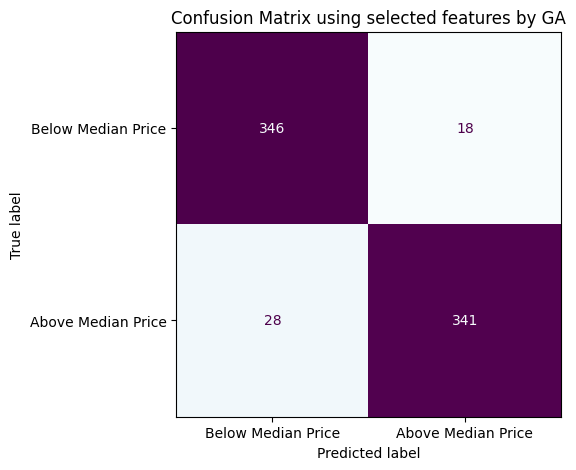

In [ ]:
# Generate confusion matrix and plot it
cm_ga = confusion_matrix(y_test, pred_ga)
cmd_ga = ConfusionMatrixDisplay(cm_ga, display_labels=list(classes.values()))

fig, ax = plt.subplots(figsize=(5, 5))
cmd_ga.plot(ax=ax, cmap='BuPu', colorbar=False)
plt.title("Confusion Matrix using selected features by GA")
plt.show()

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# PSO parameters
n_particles = 30       # Number of particles in the swarm
n_iterations = 50      # Number of iterations (generations)
n_features = X_train.shape[1]  # Number of features

w = 0.5                # Inertia weight
c1 = 1.5               # Cognitive component (personal best influence)
c2 = 1.5               # Social component (global best influence)

# Set random seed for reproducibility
np.random.seed(SEED)

# Initialize particles and velocities
particles = np.random.rand(n_particles, n_features)      # Positions (values between 0 and 1)
velocities = np.random.rand(n_particles, n_features)     # Velocities

# Initialize personal best positions and scores
personal_best_positions = particles.copy()
personal_best_scores = np.zeros(n_particles)

# Evaluate initial particles
for i in range(n_particles):
    selected = particles[i] > 0.5  # Binary mask for selected features
    if np.sum(selected) == 0:      # If no feature selected
        personal_best_scores[i] = 0
    else:

        model.fit(X_train[:, selected], y_train)
        preds = model.predict(X_test[:, selected])
        personal_best_scores[i] = accuracy_score(y_test, preds)

# Find the global best particle
global_best_idx = np.argmax(personal_best_scores)
global_best_position = personal_best_positions[global_best_idx].copy()

# PSO main loop
for iteration in range(n_iterations):
    for i in range(n_particles):
        # Generate random numbers for velocity update
        r1 = np.random.rand(n_features)
        r2 = np.random.rand(n_features)

        # Update velocity based on personal and global bests
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best_positions[i] - particles[i])
            + c2 * r2 * (global_best_position - particles[i])
        )

        # Update particle position and clip to [0, 1]
        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], 0, 1)

        # Evaluate new position
        selected = particles[i] > 0.5
        if np.sum(selected) == 0:
            score = 0
        else:
            model = SVC(kernel='linear', random_state=SEED)
            model.fit(X_train[:, selected], y_train)
            preds = model.predict(X_test[:, selected])
            score = accuracy_score(y_test, preds)

        # Update personal best if current score is better
        if score > personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = particles[i].copy()

    # Update global best
    global_best_idx = np.argmax(personal_best_scores)
    global_best_position = personal_best_positions[global_best_idx].copy()

    print(f"Iteration {iteration+1}/{n_iterations}, Best Accuracy: {personal_best_scores[global_best_idx]:.4f}")

# Get the best feature subset from the final global best particle
best_features_mask = global_best_position > 0.5
selected_features = X.columns[best_features_mask]
print("Best features selected by PSO:")
print(selected_features)

# Train final model using selected features
X_train_pso = X_train[:, best_features_mask]
X_test_pso = X_test[:, best_features_mask]

final_model = SVC(kernel='linear', random_state=SEED)
final_model.fit(X_train_pso, y_train)
pred_pso = final_model.predict(X_test_pso)
acc_pso = accuracy_score(y_test, pred_pso)

print("Accuracy using PSO-selected features: {:.2f}%".format(acc_pso * 100))


Iteration 1/50, Best Accuracy: 0.9413
Iteration 2/50, Best Accuracy: 0.9454
Iteration 3/50, Best Accuracy: 0.9482
Iteration 4/50, Best Accuracy: 0.9482
Iteration 5/50, Best Accuracy: 0.9495
Iteration 6/50, Best Accuracy: 0.9495
Iteration 7/50, Best Accuracy: 0.9523
Iteration 8/50, Best Accuracy: 0.9523
Iteration 9/50, Best Accuracy: 0.9523
Iteration 10/50, Best Accuracy: 0.9523
Iteration 11/50, Best Accuracy: 0.9523
Iteration 12/50, Best Accuracy: 0.9523
Iteration 13/50, Best Accuracy: 0.9523
Iteration 14/50, Best Accuracy: 0.9523
Iteration 15/50, Best Accuracy: 0.9523
Iteration 16/50, Best Accuracy: 0.9523
Iteration 17/50, Best Accuracy: 0.9523
Iteration 18/50, Best Accuracy: 0.9523
Iteration 19/50, Best Accuracy: 0.9523
Iteration 20/50, Best Accuracy: 0.9523
Iteration 21/50, Best Accuracy: 0.9523
Iteration 22/50, Best Accuracy: 0.9523
Iteration 23/50, Best Accuracy: 0.9523
Iteration 24/50, Best Accuracy: 0.9523
Iteration 25/50, Best Accuracy: 0.9523
Iteration 26/50, Best Accuracy: 0.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

acc_base = accuracy_score(y_test, pred)
report_base = classification_report(y_test, pred)

acc_ga = accuracy_score(y_test, pred_ga)
report_ga = classification_report(y_test, pred_ga)

acc_pso = accuracy_score(y_test, pred_pso)
report_pso = classification_report(y_test, pred_pso)

compare_all(acc_base, report_base, acc_ga, report_ga, acc_pso, report_pso)


Accuracy Scores:
Original : 94.00%
GA       : 93.72%
PSO      : 95.23%

Classification Reports:

Original:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       364
           1       0.93      0.95      0.94       369

    accuracy                           0.94       733
   macro avg       0.94      0.94      0.94       733
weighted avg       0.94      0.94      0.94       733

GA:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       364
           1       0.95      0.92      0.94       369

    accuracy                           0.94       733
   macro avg       0.94      0.94      0.94       733
weighted avg       0.94      0.94      0.94       733

PSO:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       364
           1       0.95      0.95      0.95       369

    accuracy                           0.95       733
   macro avg

In [ ]:
def compare_all(acc_base, report_base, acc_ga, report_ga, acc_pso, report_pso):
    print("Accuracy Scores:")
    print(f"Original : {acc_base * 100:.2f}%")
    print(f"GA       : {acc_ga * 100:.2f}%")
    print(f"PSO      : {acc_pso * 100:.2f}%\n")

    print("Classification Reports:\n")
    print("Original:")
    print(report_base)
    print("GA:")
    print(report_ga)
    print("PSO:")
    print(report_pso)


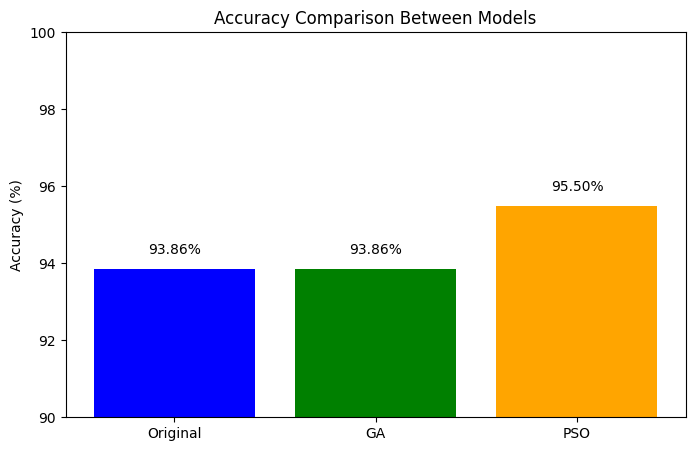

In [ ]:
import matplotlib.pyplot as plt

# قيم الدقة (Accuracy) من نتايجك
acc_base = 0.9386
acc_ga = 0.9386
acc_pso = 0.9550

def plot_accuracy_comparison(acc_base, acc_ga, acc_pso):
    models = ['Original', 'GA', 'PSO']
    accuracies = [acc_base * 100, acc_ga * 100, acc_pso * 100]  # نحولها للنسبة المئوية

    plt.figure(figsize=(8,5))
    bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

    plt.ylim(90, 100)  # نحدد المحور الصادي عشان يوضح الفروق كويس
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy Comparison Between Models')

    # نكتب القيمة فوق كل بار
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.2f}%', ha='center', va='bottom')

    plt.show()

plot_accuracy_comparison(acc_base, acc_ga, acc_pso)
